In [1]:
from sklearn.linear_model import LogisticRegression as lr 
from sklearn.metrics import classification_report as cr 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing

In [2]:
test=pd.read_csv("Obesity/test.csv")
train=pd.read_csv("Obesity/train.csv")

In [3]:
labeler=LabelEncoder()

In [4]:
train["Gender"]=labeler.fit_transform(train["Gender"])
train["family_history_with_overweight"]=labeler.fit_transform(train["family_history_with_overweight"])
train["FAVC"]=labeler.fit_transform(train["FAVC"])
train["CAEC"]=labeler.fit_transform(train["CAEC"])
train["SMOKE"]=labeler.fit_transform(train["SMOKE"])
train["SCC"]=labeler.fit_transform(train["SCC"])
train["CALC"]=labeler.fit_transform(train["CALC"])
train["MTRANS"]=labeler.fit_transform(train["MTRANS"])
train["NObeyesdad"]=labeler.fit_transform(train["NObeyesdad"])

In [5]:
test["Gender"]=labeler.fit_transform(test["Gender"])
test["family_history_with_overweight"]=labeler.fit_transform(test["family_history_with_overweight"])
test["FAVC"]=labeler.fit_transform(test["FAVC"])
test["CAEC"]=labeler.fit_transform(test["CAEC"])
test["SMOKE"]=labeler.fit_transform(test["SMOKE"])
test["SCC"]=labeler.fit_transform(test["SCC"])
test["CALC"]=labeler.fit_transform(test["CALC"])
test["MTRANS"]=labeler.fit_transform(test["MTRANS"])

In [6]:
X=train.drop(["id", "NObeyesdad"], axis=1)
y=train["NObeyesdad"]

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'family_history_with_overweight'}>,
        <Axes: title={'center': 'FAVC'}>,
        <Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>],
       [<Axes: title={'center': 'CAEC'}>,
        <Axes: title={'center': 'SMOKE'}>,
        <Axes: title={'center': 'CH2O'}>,
        <Axes: title={'center': 'SCC'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: title={'center': 'CALC'}>,
        <Axes: title={'center': 'MTRANS'}>]], dtype=object)

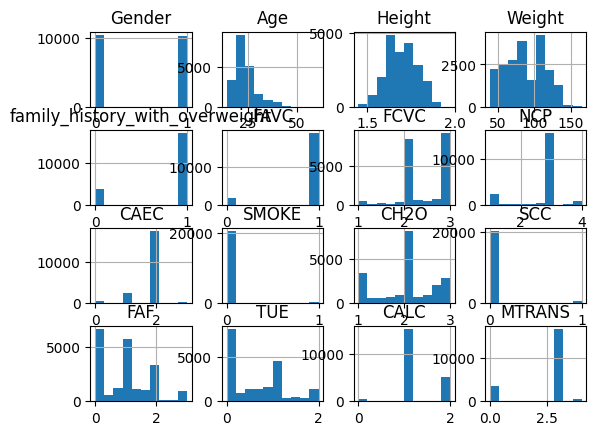

In [7]:
X.hist()

<Axes: >

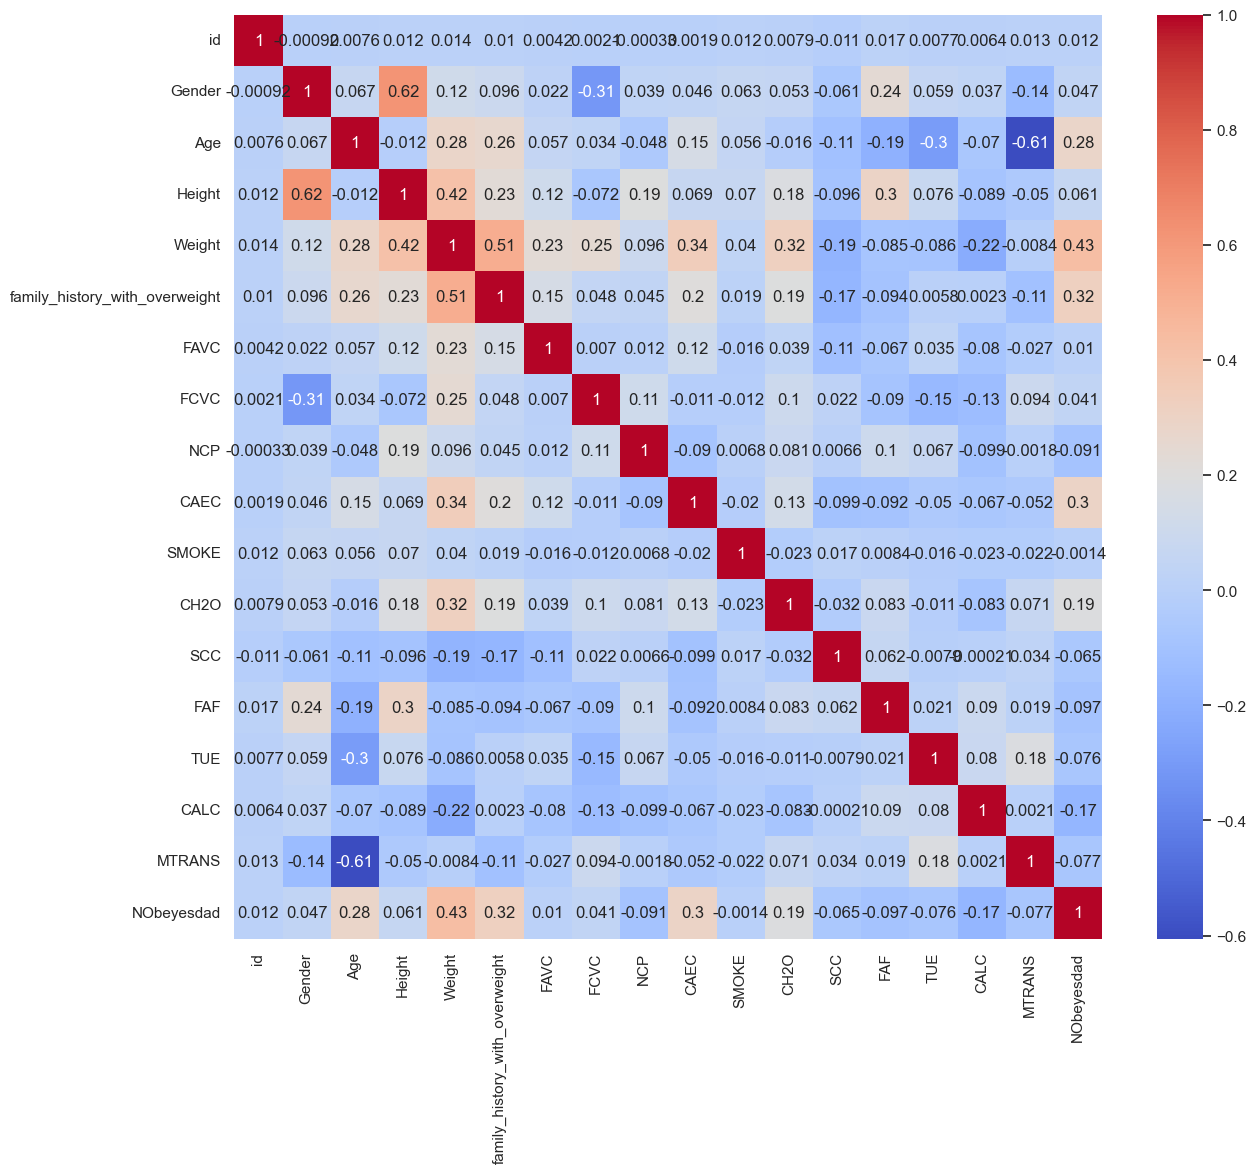

In [26]:
sns.set(rc={'figure.figsize': (14, 12)})
sns.heatmap(train.corr(), annot=True, cmap="coolwarm")

In [27]:
X_train_update=X[["Age", "Weight", "family_history_with_overweight", "CAEC", "CH2O", "CALC"]]
X_test_update=test[["Age", "Weight", "family_history_with_overweight", "CAEC", "CH2O", "CALC"]]

In [9]:
X_test=test.drop("id", axis=1)

## Multinomial Logistic Regression Model

In [57]:
model = lr(multi_class='multinomial', penalty="l1",  C=.5,  class_weight="balanced", solver='saga') 
mlt_y=train["NObeyesdad"]-1 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [58]:
n_scores = cross_val_score(model, X, mlt_y, scoring='accuracy', cv=cv, n_jobs=-1) 
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.743 (0.007)


In [59]:
model.fit(X, mlt_y)
MLR_predictions=[int(round(i,0)) for i in np.maximum(model.predict(X_test),0)]
MLR_predictions[:5]

[2, 4, 3, 1, 3]

In [60]:
test["NObeyesdad"]=MLR_predictions
submission=test[["id", "NObeyesdad"]]
submission.to_csv("obesisty_submission1.csv", index=False)

## Quadratic Discriminant Analysis Model

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda 
model2 = lda() 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [66]:
n_scores2 = cross_val_score(model2, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
print('Mean Accuracy qda: %.3f (%.3f)' % (np.mean(n_scores2), np.std(n_scores2)))

Mean Accuracy qda: 0.819 (0.006)


In [67]:
model2.fit(X, y)
QDA_predictions=[int(round(i,0)) for i in np.maximum(model2.predict(X_test),0)]
QDA_predictions[:5]

[3, 5, 4, 3, 4]

In [68]:
test["NObeyesdad"]=QDA_predictions
submission=test[["id", "NObeyesdad"]]
submission.to_csv("obesisty_submission2.csv", index=False)

## Naïve Bayes Model

In [76]:
from sklearn.naive_bayes import MultinomialNB as mnb 
model3=mnb() 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [77]:
n_scores = cross_val_score(model3, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.646 (0.009)


In [78]:
model3.fit(X, y)
NB_predictions=[int(round(i,0)) for i in np.maximum(model3.predict(X_test),0)]
NB_predictions[:5]

[3, 5, 4, 3, 4]

In [79]:
test["NObeyesdad"]=NB_predictions
submission=test[["id", "NObeyesdad"]]
submission.to_csv("obesisty_submission3.csv", index=False)

## Support Vector Machine

In [80]:
from sklearn.svm import SVC as svc
model4=svc()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [81]:
n_scores = cross_val_score(model4, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.718 (0.010)


In [82]:
model4.fit(X, y)
SVM_predictions=pred2=[int(round(i,0)) for i in np.maximum(model4.predict(X_test),0)]
SVM_predictions[:5]

[3, 1, 4, 2, 4]

In [83]:
test["NObeyesdad"]=SVM_predictions
submission=test[["id", "NObeyesdad"]]
submission.to_csv("obesisty_submission4.csv", index=False)